In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
Station1 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\bramprakash_temp.csv'
df1 = pd.read_csv(Station1)
print(df1.head(3))

       date  temperature at 14:00
0  1-6-2023                  37.5
1  2-6-2023                  36.6
2  3-6-2023                  37.6


In [5]:
Station2 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\mundka_temp.csv'
df2 = pd.read_csv(Station2)
print(df2.head(3))

       date  temperature at 14:00
0  1-6-2023                  37.7
1  2-6-2023                  36.7
2  3-6-2023                  37.1


In [6]:
Station3 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\narela_temp.csv'
df3 = pd.read_csv(Station3)
print(df3.head(3))

       date  temperature at 14:00
0  1-6-2023                  35.4
1  2-6-2023                  35.4
2  3-6-2023                  36.2


In [7]:
Station4 = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\pooth-khurd_temp.csv'
df4 = pd.read_csv(Station4)
print(df4.head(3))

       date  temperature at 14:00
0  1-6-2023                  34.6
1  2-6-2023                  34.6
2  3-6-2023                  35.8


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

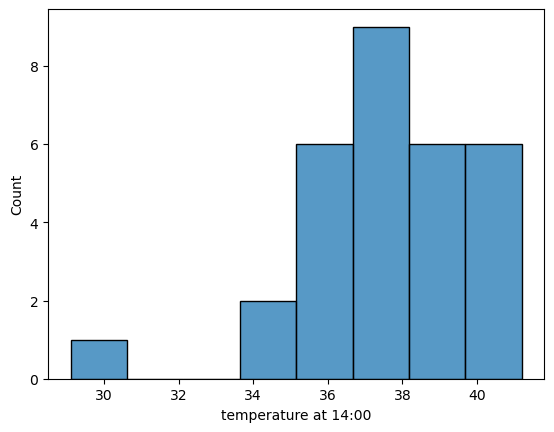

The dataset does not follow a normal distribution.


In [9]:
Temp1 = df1['temperature at 14:00']
sns.histplot(Temp1)
plt.show()

statistic, p_value = shapiro(df1['temperature at 14:00'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

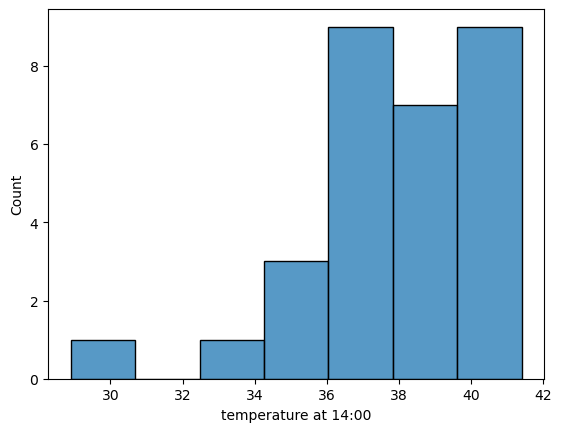

The dataset does not follow a normal distribution.


In [10]:
Temp2 = df2['temperature at 14:00']
sns.histplot(Temp2)
plt.show()

statistic, p_value = shapiro(df2['temperature at 14:00'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

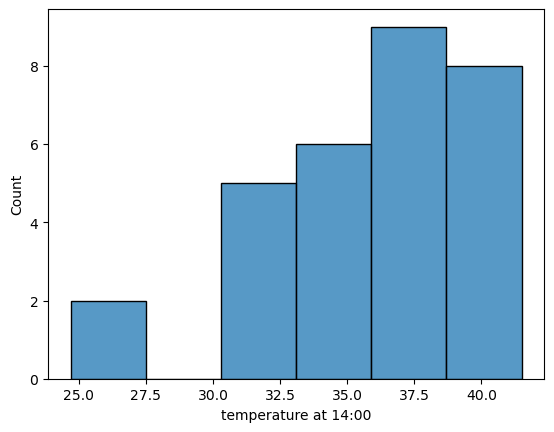

The dataset follows a normal distribution.


In [11]:
Temp3 = df3['temperature at 14:00']
sns.histplot(Temp3)
plt.show()

statistic, p_value = shapiro(df3['temperature at 14:00'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

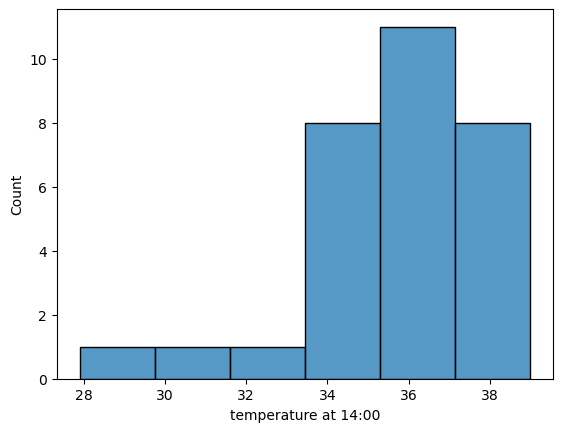

The dataset does not follow a normal distribution.


In [12]:
Temp4 = df4['temperature at 14:00']
sns.histplot(Temp4)
plt.show()

statistic, p_value = shapiro(df4['temperature at 14:00'])

alpha = 0.05
if p_value > alpha:
    print("The dataset follows a normal distribution.")
else:
    print("The dataset does not follow a normal distribution.")

# Kruskal-Wallis Test

All the dataset does not follow normal distribution, therefore a non-parametric statistical method is chosen. We use Kruskal-Wallis test to see whether there's a significant difference between dataset.

H0 : the distributions of all groups are equal (there's no difference among groups)
H1 : at least one group has a different distribution (there's a difference among groups)

In [13]:
from scipy.stats import kruskal
import matplotlib.pyplot as plt
import seaborn as sns

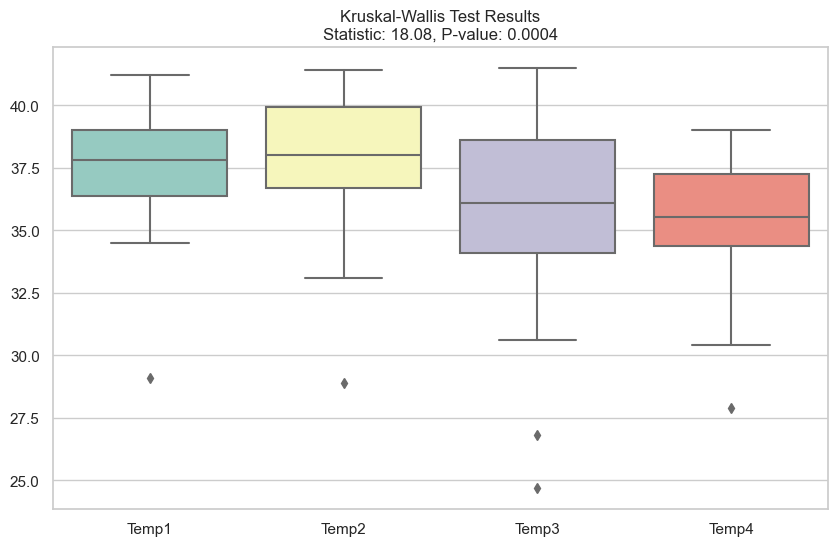

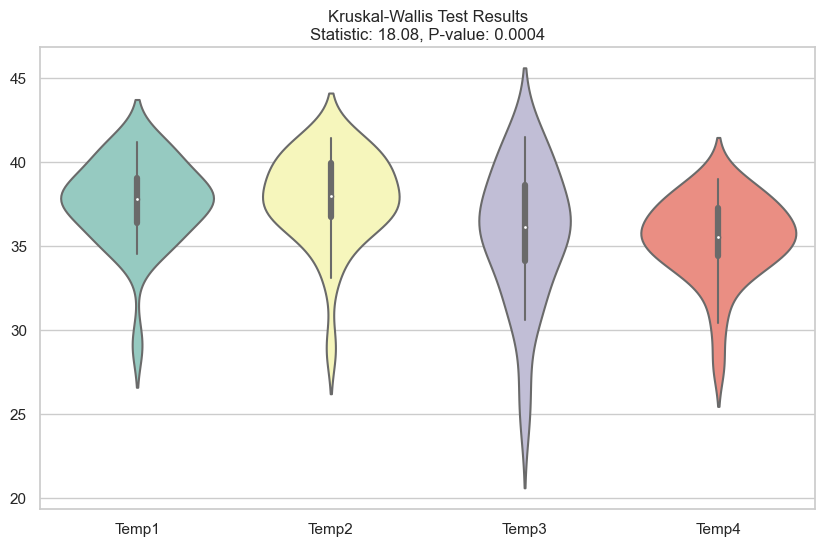

Kruskal-Wallis Statistic: 18.077790552275054
P-value: 0.00042389564480505335
There is a significant difference between at least two groups.


In [14]:
statistic, p_value = kruskal(Temp1, Temp2, Temp3, Temp4)

data = pd.DataFrame({
    'Temp1': Temp1,
    'Temp2': Temp2,
    'Temp3': Temp3,
    'Temp4': Temp4
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, palette="Set3")
plt.title('Kruskal-Wallis Test Results\n'
          f'Statistic: {statistic:.2f}, P-value: {p_value:.4f}')
plt.show()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.violinplot(data=data, palette="Set3")
plt.title('Kruskal-Wallis Test Results\n'
          f'Statistic: {statistic:.2f}, P-value: {p_value:.4f}')
plt.show()

print(f"Kruskal-Wallis Statistic: {statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between at least two groups.")
else:
    print("There is no significant difference between the groups.")

# Correlation Analysis

Spearman rank correlation analysis is chosen as a non-parametric method to see whether there's a correlation between NDVI and air temperature, how strong the correlation is, and in which direction the correlation goes

H0 : There's no correlation between NDVI and air temperature
H1 : There's a correlation between NDVI and air temperature

In [15]:
from scipy.stats import spearmanr

In [16]:
Station_All = r'C:\Users\Asus\Documents\Backup Detha\Master Degree\Wageningen\Lecture\Data Science\Assignments\Group Project\Statistical Analysis\Cluster A\Temperature_NDVI_clusterA.csv'
dfall = pd.read_csv(Station_All)
print(dfall.head(3))

         date  temperature at 14:00      NDVI
0  01/06/2023                  37.5  0.307811
1  02/06/2023                  36.6  0.307811
2  03/06/2023                  37.6  0.307811


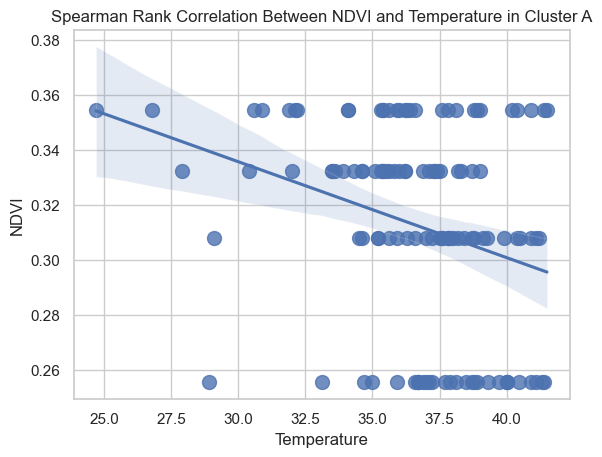

The correlation is statistically significant.
Spearman correlation coefficient: -0.3108592675059396
P-value: 0.0005489132326706049


In [19]:
x = dfall['temperature at 14:00']
y = dfall['NDVI']
corr_coefficient, p_value = spearmanr(x, y)

sns.regplot(x=x, y=y, scatter_kws={'s': 100})
plt.xlabel('Temperature')
plt.ylabel('NDVI')
plt.title('Spearman Rank Correlation Between NDVI and Temperature in Cluster A')
plt.show()

alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("There is no statistically significant correlation.")

print("Spearman correlation coefficient:", corr_coefficient)
print("P-value:", p_value)